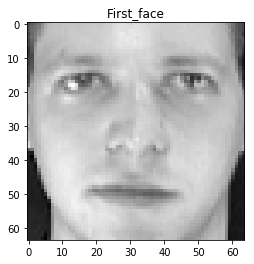

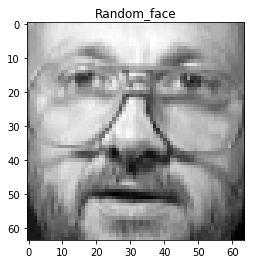

In [12]:
import numpy as np
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
import random

######### Load the data ##########

infile = open('faces.csv','r')
img_data = infile.read().strip().split('\n')
img = [map(int,a.strip().split(',')) for a in img_data]
pixels = []
for p in img:
    pixels += p
faces = np.reshape(pixels,(400,4096))

######### Global Variable ##########

image_count = 0


######### Function that normalizes a vector x (i.e. |x|=1 ) #########

# > numpy.linalg.norm(x, ord=None, axis=None, keepdims=False)
#   This function is able to return one of eight different matrix norms,
#   or one of an infinite number of vector norms (described below),
#   depending on the value of the ord parameter.
#   Note: in the given functionm, U should be a vector, not a array.
#         You can write your own normalize function for normalizing
#         the colomns of an array.

def normalize(U):
	return U / LA.norm(U)

######### Display first face #########

# Useful functions:
# > numpy.reshape(a, newshape, order='C')
#   Gives a new shape to an array without changing its data.
# > matplotlib.pyplot.figure()
# 	Creates a new figure.
# > matplotlib.pyplot.title()
#	Set a title of the current axes.
# > matplotlib.pyplot.imshow()
#	Display an image on the axes.
#	Note: You need a matplotlib.pyplot.show() at the end to display all the figures.

first_face = np.reshape(faces[0],(64,64),order='F')
image_count+=1
plt.figure(image_count)
plt.title('First_face')
plt.imshow(first_face,cmap=plt.cm.gray)


########## display a random face ###########

# Useful functions:
# > numpy.random.choice(a, size=None, replace=True, p=None)
#   Generates a random sample from a given 1-D array
# > numpy.ndarray.shape()
#   Tuple of array dimensions.
#   Note: There are two ways to order the elements in an array:
#         column-major order and row-major order. In np.reshape(),
#         you can switch the order by order='C' for row-major(default),
#         or by order='F' for column-major.


#### Your Code Here ####
#Randomly Displaying faces
random_face=faces[random.randint(0,len(faces))]
random_face_display = np.reshape(random_face,(64,64),order='F')
image_count+=1
plt.figure(image_count)
plt.title('Random_face')
plt.imshow(random_face_display,cmap=plt.cm.gray)


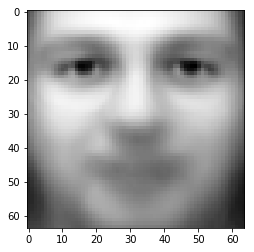

In [13]:
########## compute and display the mean face ###########

# Useful functions:
# > numpy.mean(a, axis='None', ...)
#   Compute the arithmetic mean along the specified axis.
#   Returns the average of the array elements. The average is taken over
#   float64 intermediate and return values are used for integer inputs.

#   the flattened array by default, otherwise over the specified axis.
#### Your Code Here ####
for p in faces:
    mean_faces=(np.mean(faces[p],axis=0))
mean_faces_vec = np.matrix(np.mean(faces,axis = 0))
mean_faces_vec = np.reshape(mean_faces_vec,(64,64),order = 'F')
plt.figure()
plt.imshow(mean_faces_vec,cmap = plt.cm.gray)


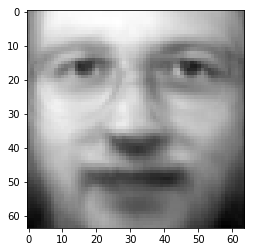

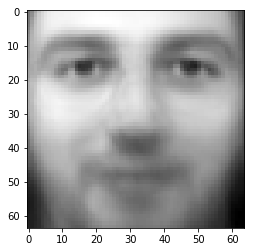

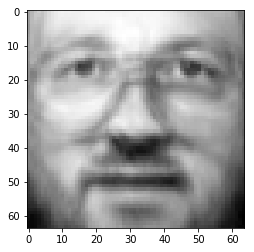

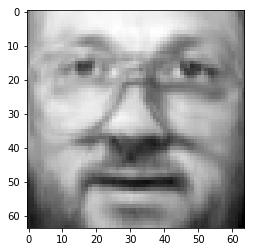

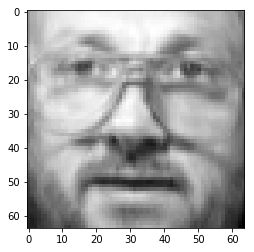

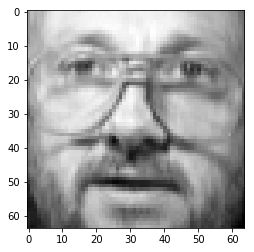

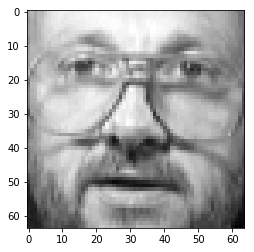

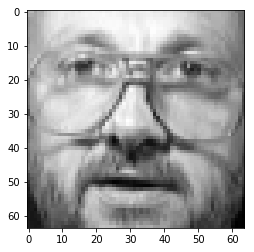

In [14]:
########## Reconstruct the first face using the first two PCs #########

#### Your Code Here ####


pcas2 = z_sorted[:,0:2]

omega = np.matrix.transpose(pcas2) * np.matrix.transpose(np.matrix(faces[0] - mean_faces))
mat_mean_faces=np.matrix.transpose(mean_faces)
mat_mean_faces.shape=(4096,1)

reconstructFirstFace = np.reshape(mat_mean_faces + (pcas2 * omega),(64,64),order = 'F')

plt.figure()
plt.imshow(reconstructFirstFace,cmap = plt.cm.gray)


########## Reconstruct random face using the first 5, 10, 25, 50, 100, 200, 300, 399  PCs ###########

#### Your Code Here ####

check_list = [5,10,25,50,100,200,300,399]

for i in range(len(check_list)):
    pcas_new = z_sorted[:, 0:check_list[i]]
    mat_mean_faces = np.matrix.transpose(mean_faces)
    mat_mean_faces.shape = (4096, 1)

    omega = np.matrix.transpose(pcas_new) * np.matrix.transpose(np.matrix(random_face - mean_faces))
    reconstructRandomFace = np.reshape(mat_mean_faces + (pcas_new * omega), (64, 64), order='F')

    plt.figure(i)
    plt.imshow(reconstructRandomFace, cmap=plt.cm.gray)

Text(0, 0.5, 'Proportion of variance')

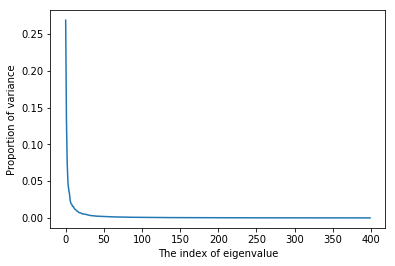

In [15]:
######### Plot proportion of variance of all the PCs ###############

# Useful functions:
# > matplotlib.pyplot.plot(*args, **kwargs)
#   Plot lines and/or markers to the Axes.
# > matplotlib.pyplot.show(*args, **kw)
#   Display a figure.
#   When running in ipython with its pylab mode,
#   display all figures and return to the ipython prompt.

#### Your Code Here ####

totalVar = np.sum(e_val_sorted)

plt.plot(range(400),e_val_sorted / totalVar)
plt.xlabel("The index of eigenvalue")
plt.ylabel("Proportion of variance")

